<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m=100
x=2*np.random.rand(m,1)

y=4.21509616+2.77011339*x+np.random.randn(m,1)

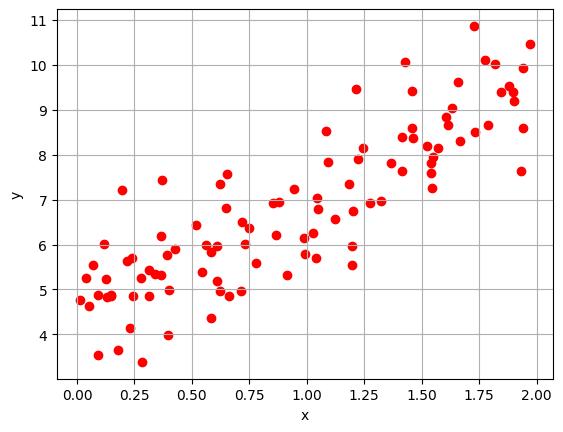

In [2]:
plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature
x_b=add_dummy_feature(x)
thethabest=np.linalg.inv(x_b.T@(x_b))@x_b.T@y

In [4]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature

class LinearRegression:
    def __init__(self, X=None, Y=None):
        self.X = X
        self.Y = Y
        self.best_fit = None
        self.y_prediction = None

    def fit(self,X,Y):
        x_b = add_dummy_feature(X)
        self.best_fit = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ Y
        self.y_prediction = x_b @ self.best_fit
        return self

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        x_b = add_dummy_feature(X)
        y_prediction = x_b @ self.best_fit
        return y_prediction


In [5]:
X = np.array([[1],
              [2],
              [3],
              [4]], dtype=float)

In [6]:
Y = np.array([[2.5],
              [3.0],
              [3.5],
              [4.0]])

In [7]:
model=LinearRegression()
model.fit(X,Y)
model.predict([[5]])

array([[4.5]])

In [8]:
thetha_best_svd,residual,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)

In [9]:
thetha_best_svd

array([[4.43019232],
       [2.54022678]])

In [10]:


class real_linear_regression:
    def __init__(self):
        self.theta_best_svd = None
        self.X = None
        self.Y = None
        self.prediction = None

    def fit(self, X, Y, rcond=1e-6):
        self.X = np.array(X)
        self.Y = np.array(Y)


        x_b = add_dummy_feature(self.X)


        U, sigma, Vt = np.linalg.svd(x_b, full_matrices=False)


        threshold = rcond * sigma[0]


        sigma_inv = np.array([1/si if si > threshold else 0 for si in sigma])


        sigma_plus = np.diag(sigma_inv)


        self.theta_best_svd = Vt.T @ sigma_plus @ U.T @ self.Y


        self.prediction = x_b @ self.theta_best_svd

        return self

    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)


        x_b = add_dummy_feature(X)


        return x_b @ self.theta_best_svd


In [11]:
model3=real_linear_regression()
model3.fit(X,Y)
model3.predict([[5]])

array([[4.5]])

In [12]:
X_verify = np.array([
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8]
], dtype=float)

y_verify = np.array([1, 2, 3, 4], dtype=float)

In [13]:
linear_model=LinearRegression().fit(X_verify,y_verify)
linear_model.predict([[5,8]])

LinAlgError: Singular matrix

In [14]:
linear_model=real_linear_regression().fit(X_verify,y_verify)
linear_model.predict([[5,8]])

array([4.2])

In [15]:
eta=0.1#learning rate
n_epochs=1000
m=len(x_b)
np.random.seed(42)
thetha=np.random.randn(2,1)
for each in range(n_epochs):
    gradients=2/m*x_b.T@(x_b@thetha-y)
    thetha=thetha-eta*gradients


In [16]:
class gradient_descent:
  def __init__(self):
    self.X=None
    self.Y=None
    self.thetha=None
    self.eta=None
    self.n_epochs=None
    self.gradient_vector=None
  def fit(self,X,Y,eta=0.05, n_epochs=20000):
     self.X = X
     self.Y = Y.reshape(-1, 1)
     self.eta = eta
     self.n_epochs = n_epochs

     x_b=add_dummy_feature(X)
     m=len(x_b)
     n=X.shape[1]
     self.thetha=np.random.randn(n+1,1)
     for each in range(n_epochs):
        self.gradient_vector=2/m*x_b.T@(x_b@self.thetha-self.Y)
        self.thetha=self.thetha-eta*self.gradient_vector
     return self
  def predict(self,X):
    x_b=add_dummy_feature(X)
    return x_b@self.thetha


In [17]:
X_gradient = np.array([
    [1, 2],
    [2, 0],
    [3, 1],
    [0, 2],
    [4, 3]
], dtype=float)

y_gradient = np.array([
    15,
    10,
    18,
    14,
    25
], dtype=float).reshape(-1, 1)

In [18]:
model_gradient=gradient_descent()
model_gradient.fit(X,Y)
model_gradient.predict([[5]])


array([[4.5]])

In [19]:
n_epochs=50
t0,t1=5,50
def learning_scheduler(t):
  return t0/(t+t1)
np.random.seed(42)
thetha=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=X_verify[random_index:random_index+1]
    yi=y_verify[random_index:random_index+1]
    gradients=2*xi.T@(xi@thetha-yi)
    eta=learning_scheduler(epoch*m+iteration)
    thetha=thetha-eta*gradients

In [ ]:
thetha

In [20]:
import numpy as np

class StochasticGradientDescent:
    def __init__(self, n_epochs=50, t0=20, t1=50):
        self.n_epochs = n_epochs
        self.t0 = t0
        self.t1 = t1
        self.theta = None

    def learning_scheduler(self, t):
        return self.t0 / (t + self.t1)

    def fit(self, X, Y):
        m, n = X.shape
        X_b = add_dummy_feature(X)
        self.theta = np.random.randn(n+1, 1)

        for epoch in range(self.n_epochs):
            for iteration in range(m):
                random_index = np.random.randint(m)
                xi = X_b[random_index:random_index+1]
                yi = Y[random_index:random_index+1]
                gradients = 2 * xi.T @ (xi @ self.theta - yi)
                eta = self.learning_scheduler(epoch * m + iteration)
                self.theta = self.theta - eta * gradients
        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        X_b = add_dummy_feature(X)
        return X_b @ self.theta


In [21]:

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

sgd = StochasticGradientDescent(n_epochs=50)
sgd.fit(X, Y)

# Predict
print(sgd.predict([[0], [2]]))  # should be close to [4], [10]


[[ 3.8596573 ]
 [10.18710266]]


In [22]:
import numpy as np

class MiniBatchGradientDescent:
    def __init__(self, n_epochs=50, t0=20, t1=50,batch_size=50):
        self.n_epochs = n_epochs
        self.t0 = t0
        self.t1 = t1
        self.theta = None
        self.batch_size=batch_size

    def learning_scheduler(self, t):
        return self.t0 / (t + self.t1)

    def fit(self, X, Y):
        m, n = X.shape
        X_b = add_dummy_feature(X)
        self.theta = np.random.randn(n+1, 1)

        for epoch in range(self.n_epochs):
            for iteration in range(m//self.batch_size):
                random_index = np.random.randint(0,m,self.batch_size)
                xi = X_b[random_index]
                m1=len(xi)
                yi = Y[random_index]
                gradients = 2 /(self.batch_size)* xi.T @ (xi @ self.theta - yi)
                eta = self.learning_scheduler(epoch * m//self.batch_size + iteration)
                self.theta = self.theta - eta * gradients
        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        X_b = add_dummy_feature(X)
        return X_b @ self.theta


In [23]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

sgd = MiniBatchGradientDescent(n_epochs=50)
sgd.fit(X, Y)

# Predict
print(sgd.predict([[0], [2]]))  # should be close to [4], [10]


[[3.68848237]
 [9.77945674]]


In [24]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([0.02146138])

In [26]:
x_poly[0]

array([0.02146138, 0.00046059])

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
line=lin_reg.fit(x_poly,y)


In [28]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,val_scores=learning_curve(lin_reg,x,y, train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error")

In [29]:
train_error=-train_scores.mean(axis=1)
val_error=-val_scores.mean(axis=1)

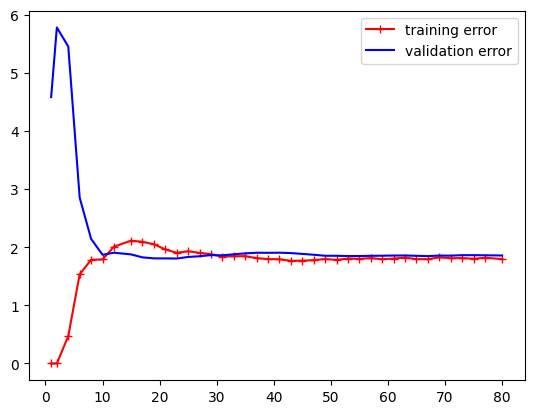

In [30]:
plt.plot(train_sizes,train_error,"r-+",label="training error")
plt.plot(train_sizes,val_error,"b-",label="validation error")
plt.legend()
plt.show()

In [31]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(x,y)


Ridge(alpha=1, solver='cholesky')

In [32]:
ridge_reg.predict([[5]])

array([8.05842324])

In [33]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[5]])

array([7.90382263])

In [34]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)

In [36]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=iris.data[["petal width (cm)"]].values
y=iris.target_names[iris.target]=="virginica"
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
log_reg=LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

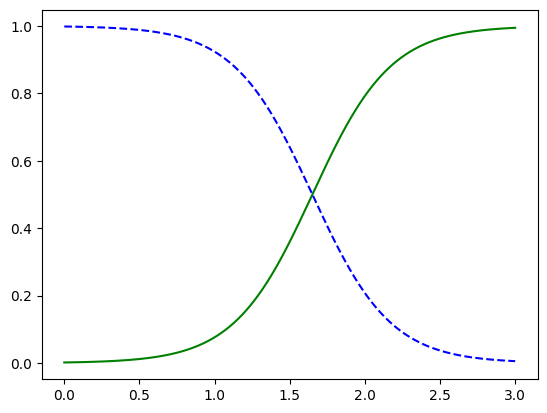

In [40]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_prob=log_reg.predict_proba(x_new)
decision_boundary=x_new[y_prob[:,1]>=0.5][0,0]
plt.plot(x_new,y_prob[:,1],"g-",label="virginica")
plt.plot(x_new,y_prob[:,0],"b--",label="not virginica")